# Project: Energy efficiency of buildings

## Conclusion: XGBoost regression gave best R square score of 99%, random forest - 96.79

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

### Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

### Data Set Information:

Energy analysis was performed using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area - m²

X3 Wall Area - m²

X4 Roof Area - m²

X5 Overall Height - m

X6 Orientation - 2:North, 3:East, 4:South, 5:West

X7 Glazing Area - 0%, 10%, 25%, 40% (of floor area)

X8 Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West

y1 Heating Load - kWh/m²

y2 Cooling Load - kWh/m²

### Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012

### Citation Request:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 (the paper can be accessed from [Web Link])

For further details on the data analysis methodology:
A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012 (which can be accessed from [Web Link])

# STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for Q-Q plots

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_excel("ENB2012_data.xlsx")

Learning the dataset and making feature engineering

In [3]:
# dropping 'Y1','Unnamed: 10','Unnamed: 11'.
# Y1 is correlated 98% with Y2.
# 'Unnamed: 10','Unnamed: 11' are null values only.
df.drop(columns=['Y1','Unnamed: 10','Unnamed: 11'], inplace=True)

In [4]:
# showing first five rows of the dateset
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [5]:
# showing the column names
list(df.columns)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y2']

In [6]:
# showing statistical information about the dataset
# df.info()

In [7]:
# showing statistical data of the dataset
# df.describe()

In [8]:
# separating dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Y2'], axis=1),  # drop the target
    df['Y2'],  # just the target
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [9]:
# checking missing values
X_train.isnull().any(axis = 1).sum()

0

In [10]:
# checking duplicated rows
X_train.duplicated().sum()

0

In [11]:
# deleting the duplicated rows
# X_train.drop_duplicates(inplace=True)
# X_test.drop_duplicates(inplace=True)

### Exploring the dataset

Visualizing data columns

Exploring distribution, skewness, outliers and other statistical properties

Looking at the distributions of the variables to see which imputation to use

In [12]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [13]:
# a function for plotting a str column of df and testing for normality

def draw_and_test(str):
    # plotting variable
    diagnostic_plots(df, str)

    # testing for normality
    print(str)
    skewness = df[str].skew()
    print('Skewness is {:.2f}'.format(skewness))
    kurtosis = df[str].kurtosis()
    print('Kurtosis is {:.2f}'.format(kurtosis))

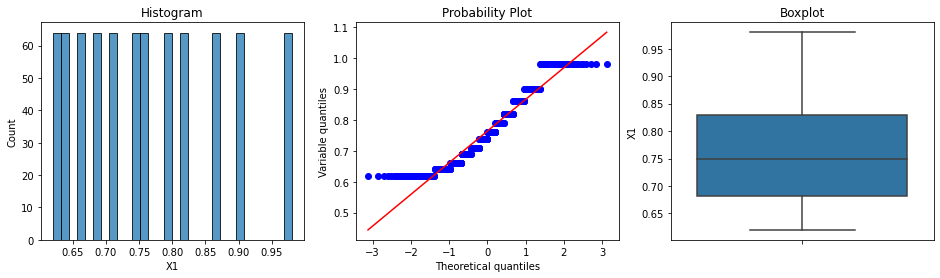

X1
Skewness is 0.50
Kurtosis is -0.71


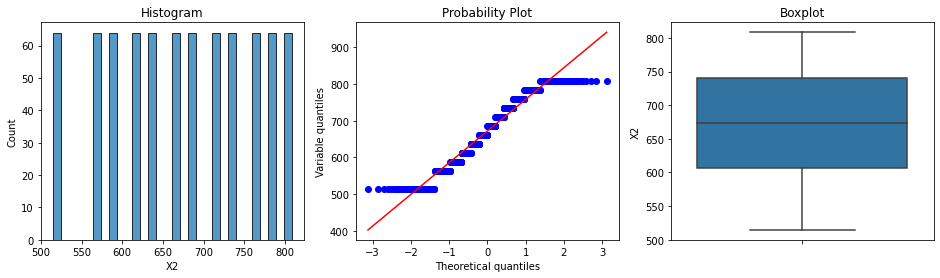

X2
Skewness is -0.13
Kurtosis is -1.06


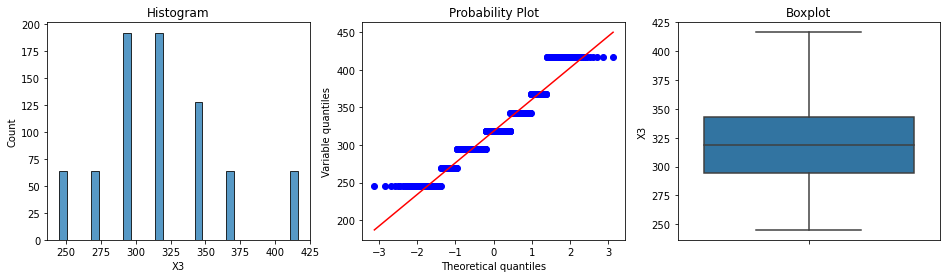

X3
Skewness is 0.53
Kurtosis is 0.12


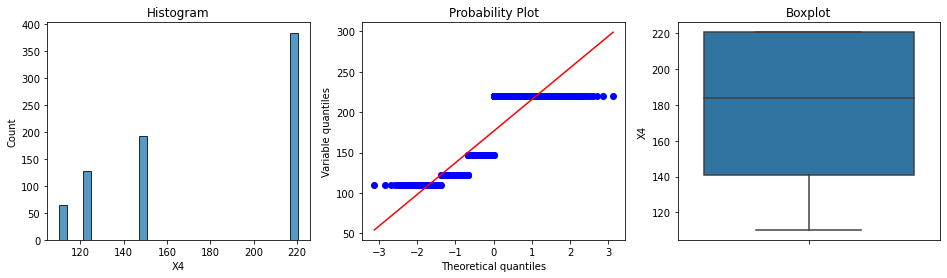

X4
Skewness is -0.16
Kurtosis is -1.78


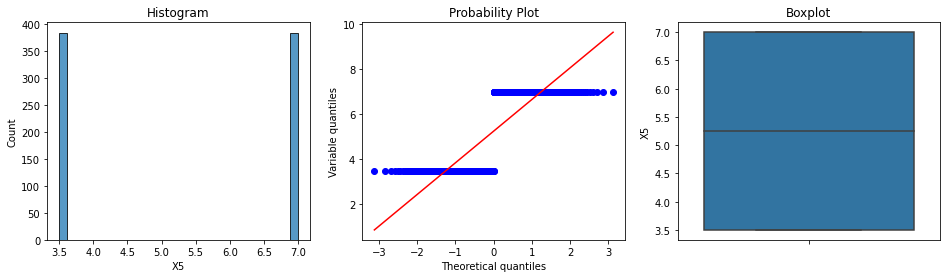

X5
Skewness is 0.00
Kurtosis is -2.01


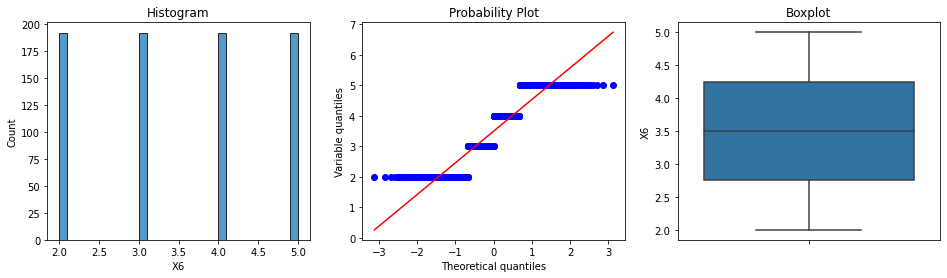

X6
Skewness is 0.00
Kurtosis is -1.36


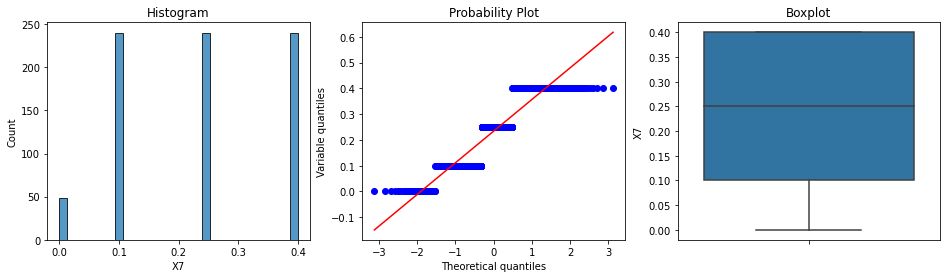

X7
Skewness is -0.06
Kurtosis is -1.33


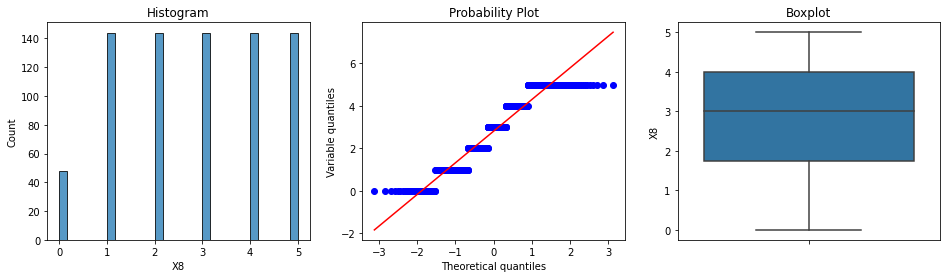

X8
Skewness is -0.09
Kurtosis is -1.15


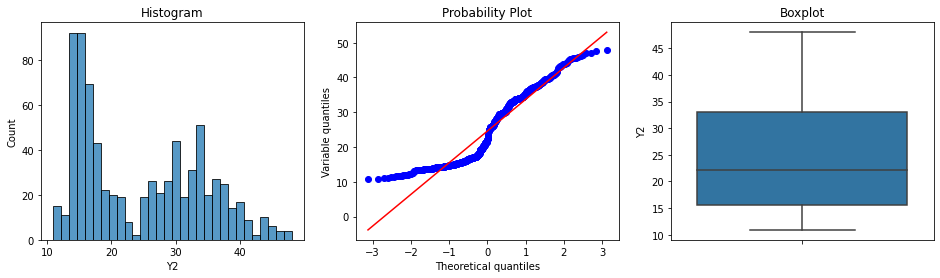

Y2
Skewness is 0.40
Kurtosis is -1.15


In [14]:
# plotting all the variables
for column in df.columns[:]:
    draw_and_test(column)

Discussion: all the variables are well-distributed. No constant or pseudo-constant features.

In [15]:
# calculating a correlation matrix
corr_matrix = df.corr()
#print(corr_matrix)

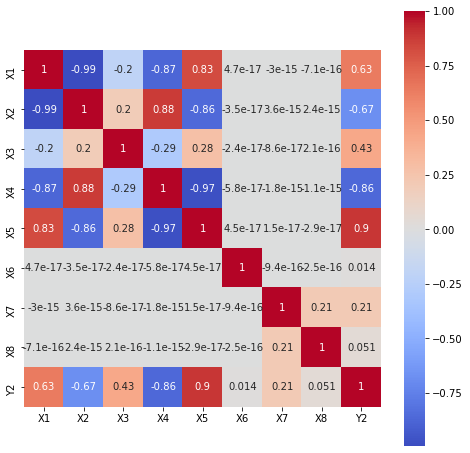

In [16]:
# drawing a heatmap
plt.figure(figsize = (8, 8))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

### Discussion:

Correlated features: X1, X2, X4 & X3.
Features X6, X7 & X8 are not correlated with the targets.

Due to a fact that quantity of features is small, all the features will be preserved.

# STEP 2: Choosing best performing regression model

### Random forest regression

In [17]:
# training the random forest regression model on the Training set

reg_rf = RandomForestRegressor(random_state = 42)
reg_rf.fit(X_train, y_train)

# predicting the Test set results

y_pred = reg_rf.predict(X_test)
r2_score(y_test, y_pred)

0.969845173023489

### XGBoost regression

In [18]:
# training the XGBoost regression model on the Training set

reg_xgb = XGBRegressor(random_state = 42)
reg_xgb.fit(X_train, y_train)

# predicting the Test set results

y_pred = reg_xgb.predict(X_test)
r2_score(y_test, y_pred)

0.9905630151663548

## Conclusion: XGBoost regression gave best R square score of 99%, random forest - 97%